In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_dir = '/content/drive/MyDrive/Covid19-dataset/train'
test_dir = '/content/drive/MyDrive/Covid19-dataset/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.4065 - loss: 1.3710 - val_accuracy: 0.6364 - val_loss: 0.7856
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.7260 - loss: 0.6234 - val_accuracy: 0.8485 - val_loss: 0.4204
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8790 - loss: 0.3033 - val_accuracy: 0.8636 - val_loss: 0.3712
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8532 - loss: 0.3485 - val_accuracy: 0.9545 - val_loss: 0.2485
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9191 - loss: 0.2827 - val_accuracy: 0.9242 - val_loss: 0.2550
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8777 - loss: 0.2981 - val_accuracy: 0.9545 - val_loss: 0.2087
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.9154 - loss: 0.2067 - val_accuracy: 0.8788 - val_loss: 0.2368
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.8835 - loss: 0.2649 - val_accuracy: 0.9394 - val_loss: 0.2242
Epoch 9/

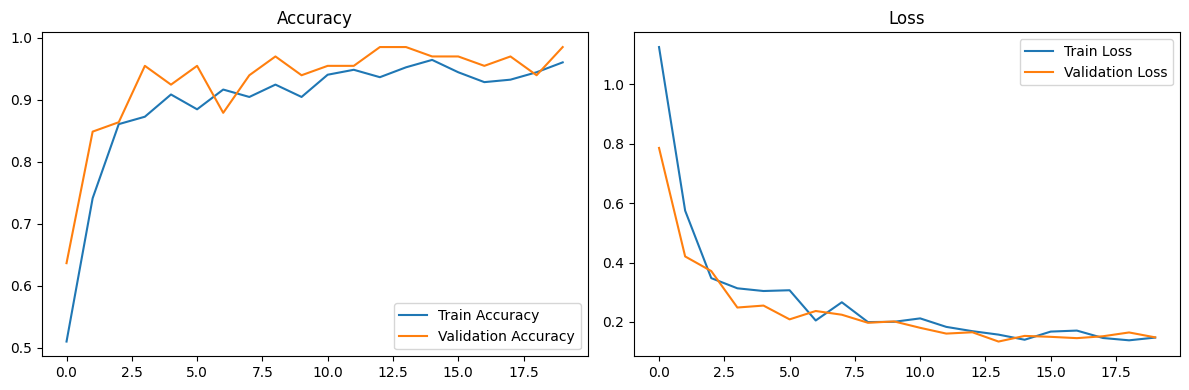

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Final Test Accuracy with MobileNetV2: {test_acc:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 980ms/step - accuracy: 0.9885 - loss: 0.1307
Final Test Accuracy with MobileNetV2: 0.98
